In [18]:
import pandas as pd
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../")
from  CommonFunc_03 import *

Analysis_title("Dive all data 파일 정리  -- 롯데 멤버스 편!")
data_column_info(data_column_info_str="""
- Author : Forrest DPark
- Description :  
.   ◻︎ Topic  :  롯데 멤버스 데이터 정리 
.   ◻︎ Detail : 
.   ◻︎ DataSet Info:
- Update : 
    2024.09.29.Sun . PM 07.37 data 정리 start
""")
DataPreprocessing.plotSetting("default")
import glob
from PIL import Image
def encoding_detector(file_path):
    import chardet ## encoding 정보 확인 라이브러리 
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        encoding = chardet.detect(raw_data)['encoding']
        print(blue(f"  - Detected encoding: {encoding}"))
        return encoding
encoding = encoding_detector("./Data/인구통계/행정안전부_지역별(행정동) 성별 연령별 주민등록 인구수_20240831.csv")
people=pd.read_csv("./Data/인구통계/행정안전부_지역별(행정동) 성별 연령별 주민등록 인구수_20240831.csv",encoding=encoding)



✻✻✻✻______👻 Dive all data 파일 정리  -- 롯데 멤버스 편! 👻______✻✻✻✻
- Author: Forrest DPark
- Description: 
.   ◻︎ Topic: 롯데 멤버스 데이터 정리
.   ◻︎ Detail: 
.   ◻︎ DataSet Info: 
- Update: 
    2024.09.29.Sun . PM 07.37 data 정리 start
  - ◎ matplot graph set complete
  - Detected encoding: EUC-KR


In [130]:
people.columns
people[people['시군구명']=='해운대구']['읍면동명'].unique()

array(['우제1동', '우제2동', '우제3동', '중제1동', '중제2동', '좌제1동', '좌제2동', '좌제3동',
       '좌제4동', '송정동', '반여제1동', '반여제2동', '반여제3동', '반여제4동', '반송제1동',
       '반송제2동', '재송제1동', '재송제2동'], dtype=object)

In [39]:

man_youth_range = [f"{i}세남자" for i in range(20,40)]
woman_youth_range = [f"{i}세여자" for i in range(20,40)]
basic_col = ['기준연월', '시도명', '시군구명', '읍면동명']
    
people['남성청년'] = people[man_youth_range].apply(sum,'columns')
people['여성청년'] = people[woman_youth_range].apply(sum,'columns')
print(basic_col.extend(['남성청년','여성청년']))
youth = people[basic_col]
man_sido = youth.groupby('시도명')['남성청년'].sum().sort_values(ascending=False)
woman_sido = youth.groupby('시도명')['여성청년'].sum().sort_values(ascending=False)

None


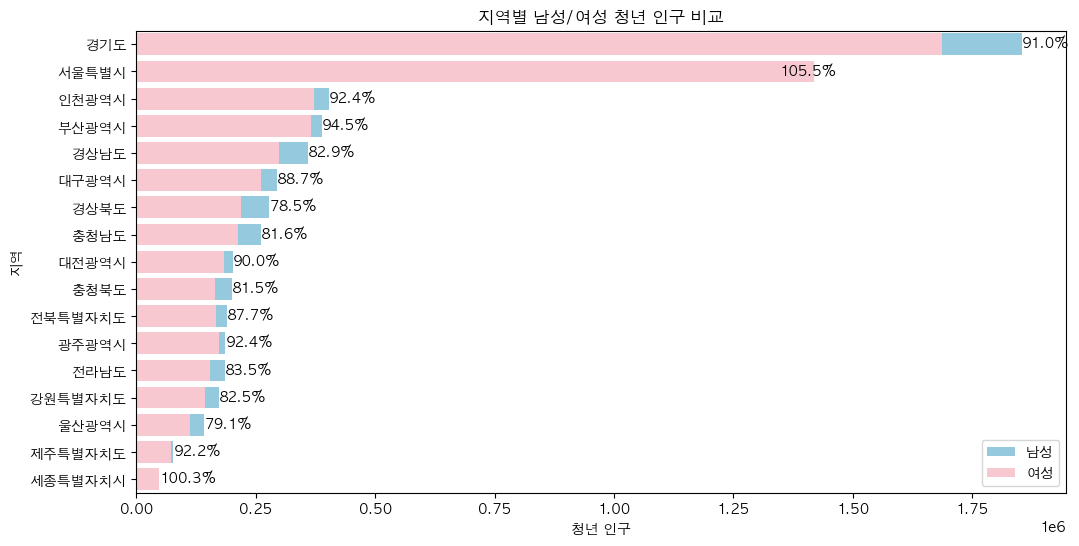

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



youth_stat = pd.concat([man_sido, woman_sido], axis=1)
youth_stat['청년전체'] = youth_stat['남성청년'] + youth_stat['여성청년']

# 막대 그래프 그리기 (남성, 여성 분리)
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

# 남성 막대 그리기
ax = sns.barplot(x='남성청년', y=youth_stat.index, data=youth_stat, label='남성', color='skyblue', orient='h')

# 여성 막대 그리기
sns.barplot(x='여성청년', y=youth_stat.index, data=youth_stat, label='여성', color='pink', orient='h')

# 남녀 비율 계산
youth_stat['비율'] = youth_stat['여성청년'] / youth_stat['남성청년'] * 100

# 각 막대 오른쪽에 비율 표시
for i, row in youth_stat.iterrows():
    ax.text(row['남성청년'] +5 , i, f'{row["비율"]:.1f}%', ha='left', va='center')

plt.xlabel('청년 인구')
plt.ylabel('지역')
plt.title('지역별 남성/여성 청년 인구 비교')
plt.legend()
# plt.tight_layout()
plt.show()

## 수도권( 서울+경기 +인천) 과 비수도권 으로 나누어서 보자 



In [99]:
youth_stat

,남성청년,여성청년,청년전체,비율
시도명,,,,
경기도,1854464,1686916,3541380,90.965152
서울특별시,1345402,1419554,2764956,105.511513
인천광역시,402856,372369,775225,92.432283
부산광역시,387903,366535,754438,94.491406
경상남도,359523,298099,657622,82.915140
대구광역시,293689,260590,554279,88.729915
경상북도,278290,218585,496875,78.545762
충청남도,260724,212835,473559,81.632301
대전광역시,202756,182475,385231,89.997337


In [100]:
sudo_range = ['서울특별시','인천광역시','경기도']

youth_stat.reset_index(inplace=True)
bisudo_range = [region for region in youth_stat['시도명'].unique().tolist() if region not in sudo_range]

수도권청년 = youth_stat[youth_stat['시도명'].isin(sudo_range)]
비수도권청년 = youth_stat[youth_stat['시도명'].isin(bisudo_range)]

수도권청년.drop('비율',axis=1,inplace=True)
비수도권청년.drop('비율',axis=1,inplace=True)


In [101]:
수도권청년_total = 수도권청년.drop('시도명',axis=1).apply(sum,axis=0)
비수도권청년_total = 비수도권청년.drop('시도명',axis=1).apply(sum,axis=0)

In [116]:
sudo_bisudo_youth=pd.concat([수도권청년_total,비수도권청년_total],axis=1,keys=['수도권청년', '비수도권청년'])

sudo_bisudo_youth

,수도권청년,비수도권청년
남성청년,3602722,2987026
여성청년,3478839,2571833
청년전체,7081561,5558859


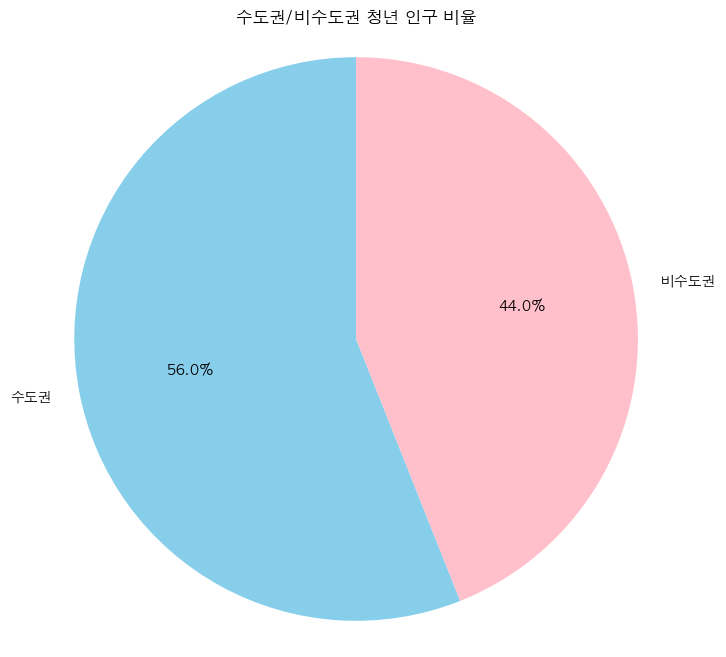

In [122]:
youth_stat = pd.DataFrame(sudo_bisudo_youth, index=['남성청년', '여성청년', '청년전체'])
labels = ['수도권', '비수도권']
colors = ['skyblue', 'pink']
plt.figure(figsize=(8, 8))
plt.pie(youth_stat.loc['청년전체'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('수도권/비수도권 청년 인구 비율')
plt.axis('equal')  # 원형으로 표시
plt.show()

## 해운대구 지역별 청년인구 구하기

In [139]:

people= people[people['시군구명']=='해운대구']
man_youth_range = [f"{i}세남자" for i in range(20,40)]
woman_youth_range = [f"{i}세여자" for i in range(20,40)]
basic_col = ['기준연월', '시도명', '시군구명', '읍면동명']
    
people['남성청년'] = people[man_youth_range].apply(sum,'columns')
people['여성청년'] = people[woman_youth_range].apply(sum,'columns')
print(basic_col.extend(['남성청년','여성청년']))
youth = people[basic_col]
man_emd = youth.groupby('읍면동명')['남성청년'].sum().sort_values(ascending=False)
woman_emd = youth.groupby('읍면동명')['여성청년'].sum().sort_values(ascending=False)

None


In [140]:
man_emd

읍면동명
좌제2동     3996
반여제1동    3983
재송제1동    3777
중제1동     3036
우제2동     2912
우제1동     2633
재송제2동    2565
우제3동     2416
좌제4동     2391
좌제1동     2083
반송제2동    1830
중제2동     1640
반여제4동    1626
좌제3동     1612
반여제2동    1258
반송제1동    1171
송정동      1013
반여제3동     742
Name: 남성청년, dtype: int64

In [141]:
import pandas as pd

data = {
    '읍면동명': ['우동', '좌동', '중동', '반송동', '송정동', '반여동', '제송동'],
    '인구': [10377, 12165, 4676, 3001, 1013, 8867, 6342]
}

df = pd.DataFrame(data)

,읍면동명,인구
0,우동,10377
1,좌동,12165
2,중동,4676
3,반송동,3001
4,송정동,1013
5,반여동,8867
6,제송동,6342
